In [1]:
import pandas as pd
df = pd.read_csv('../data/train.csv')

from pre_processing import df_transform
df_transformed = df_transform(df, True)

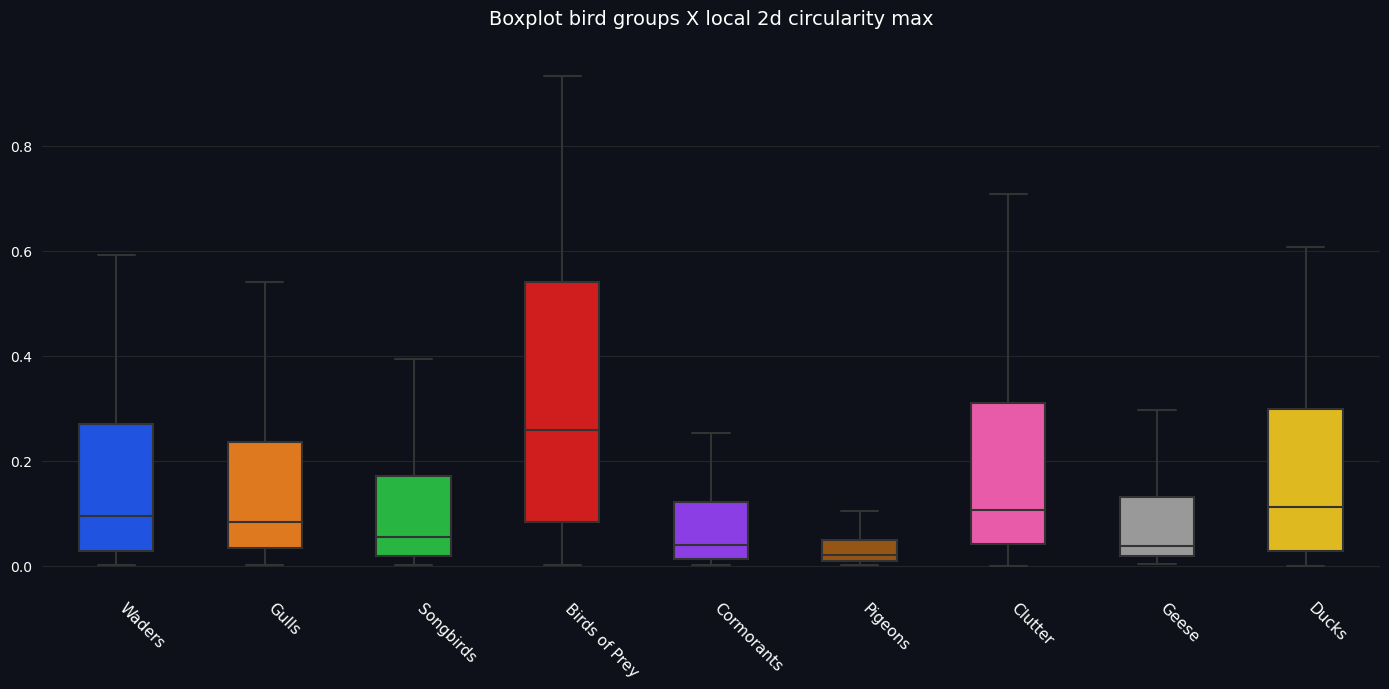

In [2]:
from plotting import plot_bird_feature
plot_bird_feature(df_transformed, "local_2d_circularity_max")